# Simple GAN for 2D Circle Generation

This notebook implements a basic Generative Adversarial Network (GAN) to generate 2D circles.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

## Generate Dataset

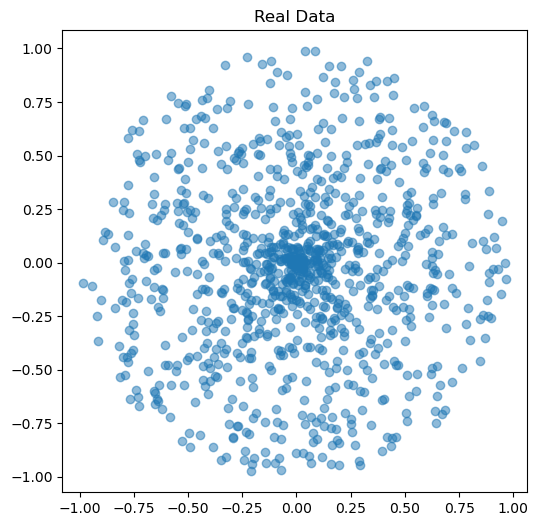

In [2]:
def generate_circle(n_samples):
    r = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2*np.pi, n_samples)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.column_stack((x, y))

n_samples = 1000
real_data = generate_circle(n_samples)

plt.figure(figsize=(6, 6))
plt.scatter(real_data[:, 0], real_data[:, 1], alpha=0.5)
plt.title("Real Data")
plt.show()

## Define Generator and Discriminator

In [3]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize models and optimizers
generator = Generator()
discriminator = Discriminator()
g_optimizer = optim.Adam(generator.parameters(), lr=0.001)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.001)

# Loss function
criterion = nn.BCELoss()

## Training Loop

In [4]:
n_epochs = 5000
batch_size = 32

for epoch in range(n_epochs):
    # Train Discriminator
    for _ in range(5):
        # Real data
        real_samples = torch.Tensor(real_data[np.random.choice(n_samples, batch_size)])
        real_labels = torch.ones(batch_size, 1)
        d_optimizer.zero_grad()
        real_output = discriminator(real_samples)
        d_loss_real = criterion(real_output, real_labels)

        # Fake data
        noise = torch.randn(batch_size, 2)
        fake_samples = generator(noise)
        fake_labels = torch.zeros(batch_size, 1)
        fake_output = discriminator(fake_samples.detach())
        d_loss_fake = criterion(fake_output, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        d_optimizer.step()

    # Train Generator
    g_optimizer.zero_grad()
    noise = torch.randn(batch_size, 2)
    fake_samples = generator(noise)
    output = discriminator(fake_samples)
    g_loss = criterion(output, real_labels)
    g_loss.backward()
    g_optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

Epoch [500/5000], d_loss: 1.4011, g_loss: 0.7075
Epoch [1000/5000], d_loss: 1.2489, g_loss: 0.8113
Epoch [1500/5000], d_loss: 1.3949, g_loss: 0.7204
Epoch [2000/5000], d_loss: 1.3598, g_loss: 0.7171
Epoch [2500/5000], d_loss: 1.4074, g_loss: 0.7414
Epoch [3000/5000], d_loss: 1.3846, g_loss: 0.6749
Epoch [3500/5000], d_loss: 1.3812, g_loss: 0.6836
Epoch [4000/5000], d_loss: 1.3851, g_loss: 0.7306
Epoch [4500/5000], d_loss: 1.3334, g_loss: 0.7247
Epoch [5000/5000], d_loss: 1.4079, g_loss: 0.7603


## Generate and Visualize Results

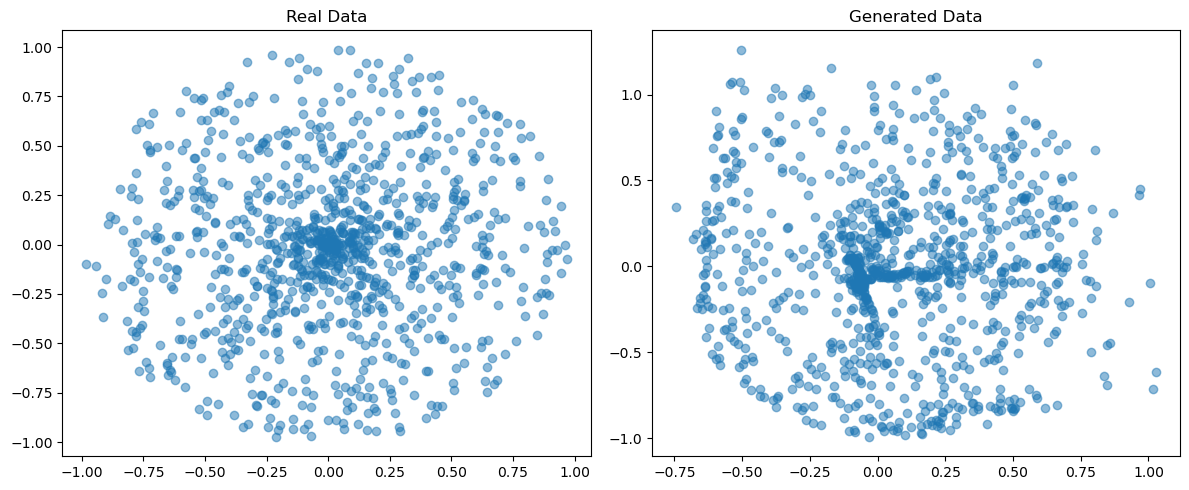

In [5]:
# Generate samples after training
with torch.no_grad():
    noise = torch.randn(n_samples, 2)
    generated_samples = generator(noise).numpy()

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(real_data[:, 0], real_data[:, 1], alpha=0.5)
plt.title("Real Data")
plt.subplot(122)
plt.scatter(generated_samples[:, 0], generated_samples[:, 1], alpha=0.5)
plt.title("Generated Data")
plt.tight_layout()
plt.show()